In [11]:
import pandas as pd
import numpy as np
marriage=pd.read_csv('/content/drive/MyDrive/기계학습/전국혼인건수81-20.CSV',encoding='cp949')
mar=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/기계/혼인.xlsx', index_col=0)
mar

,시간,혼인건수,혼인건수.1
0,1981-01-01,49285,49285
1,1981-02-01,34481,34481
2,1981-03-01,47843,47843
3,1981-04-01,35956,35956
4,1981-05-01,35769,35769
...,...,...,...
475,2020-08-01,15032,15032
476,2020-09-01,15324,15324
477,2020-10-01,16473,16473
478,2020-11-01,18177,18177


In [12]:
mar=mar[['시간', '혼인건수']]

In [13]:
mar

,시간,혼인건수
0,1981-01-01,49285
1,1981-02-01,34481
2,1981-03-01,47843
3,1981-04-01,35956
4,1981-05-01,35769
...,...,...
475,2020-08-01,15032
476,2020-09-01,15324
477,2020-10-01,16473
478,2020-11-01,18177


In [14]:
mar_df=mar.set_index('시간')
mar_df

,혼인건수
시간,
1981-01-01,49285
1981-02-01,34481
1981-03-01,47843
1981-04-01,35956
1981-05-01,35769
...,...
2020-08-01,15032
2020-09-01,15324
2020-10-01,16473


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

데이터가 패턴이 보이기 때문에 정상성이 의심됨

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 432x288 with 0 Axes>

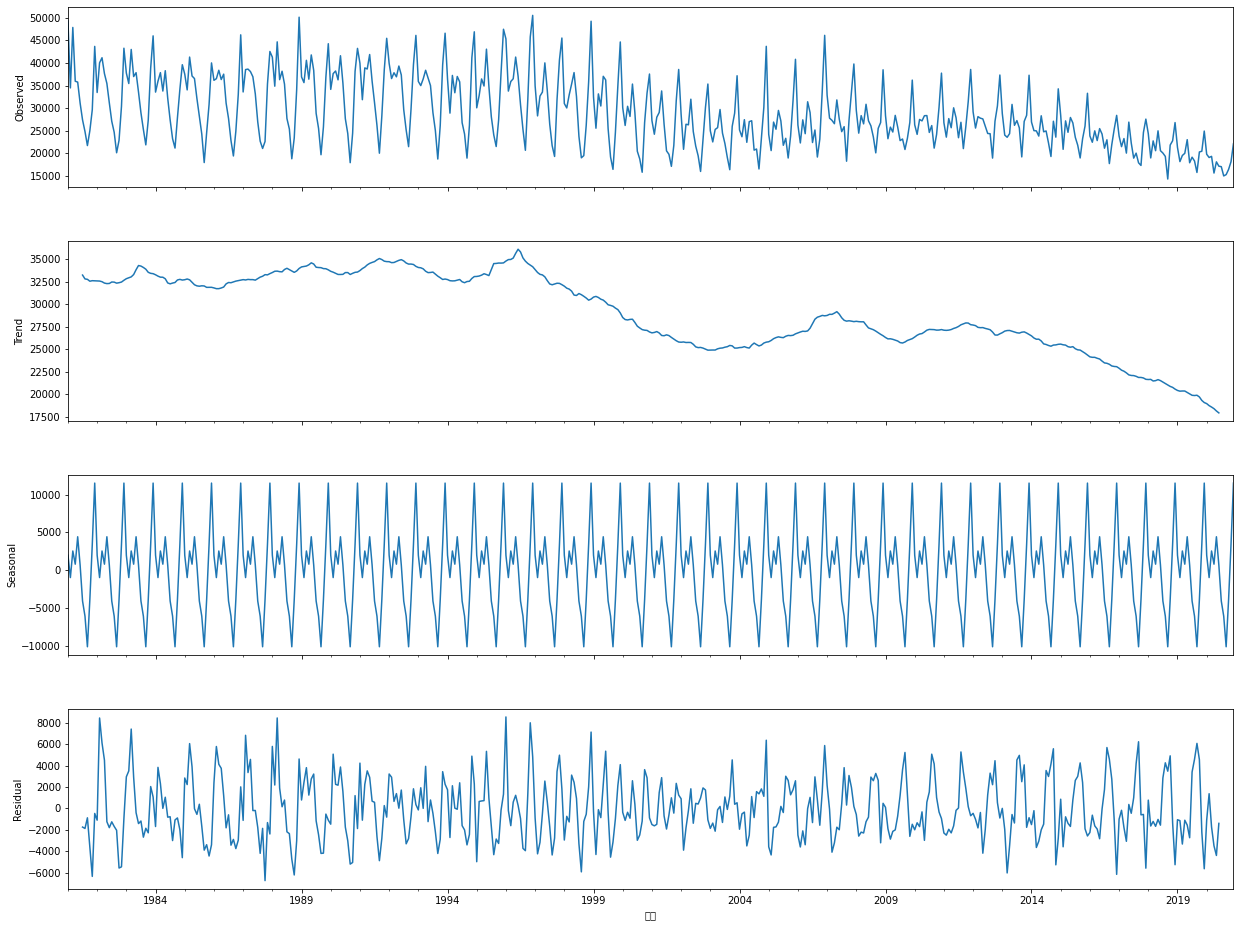

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(mar_df['혼인건수'], model="additive", freq=12)
fig=plt.figure()
fig=result.plot()
fig.set_size_inches(20,15)

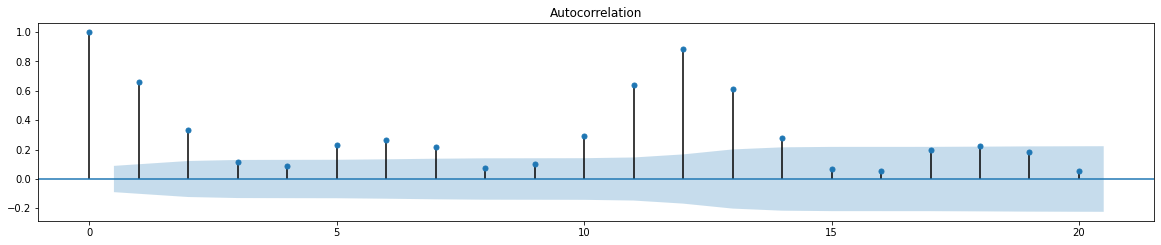

In [18]:
import statsmodels.api as sm
fig=plt.figure(figsize=(20,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(mar_df, lags=20, ax=ax1)

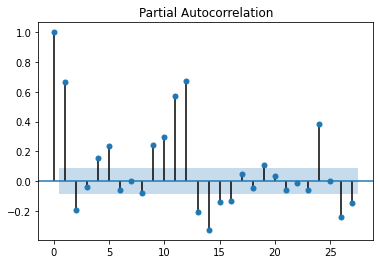

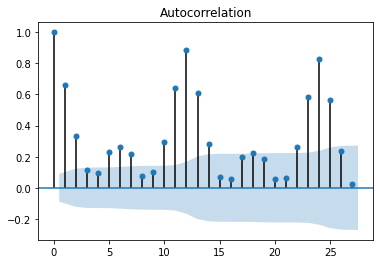

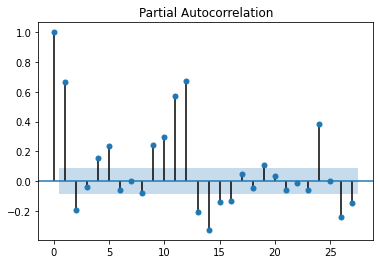

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(mar_df)
plot_pacf(mar_df)

차분 진행


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

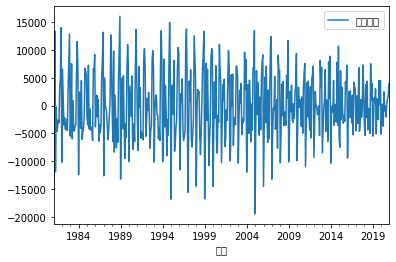

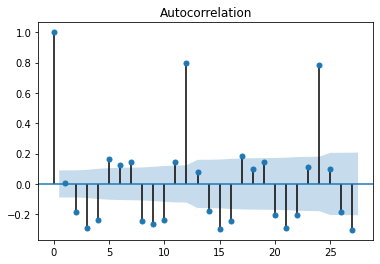

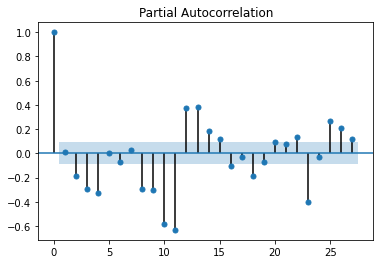

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_1=mar_df.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [41]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(mar_df, order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.혼인건수   No. Observations:                  479
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -4859.281
Method:                       css-mle   S.D. of innovations           6159.173
Date:                Fri, 27 May 2022   AIC                           9724.562
Time:                        14:33:04   BIC                           9737.077
Sample:                    02-01-1981   HQIC                          9729.482
                         - 12-01-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -56.6722    284.583     -0.199      0.842    -614.445     501.101
ma.L1.D.혼인건수     0.0113      0.057      0.196      0.845      -0.101       0.124
                                    Roots   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [29]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(mar_df, order=(1,0,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                   혼인건수   No. Observations:                  480
Model:                     ARMA(1, 1)   Log Likelihood               -4868.702
Method:                       css-mle   S.D. of innovations           6129.231
Date:                Fri, 27 May 2022   AIC                           9743.404
Time:                        14:25:27   BIC                           9755.926
Sample:                    01-01-1981   HQIC                          9748.326
                         - 12-01-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.혼인건수     0.9790      0.009    103.786      0.000       0.960       0.997
ma.L1.혼인건수     0.0267      0.057      0.467      0.640      -0.085       0.138
                                    Roots           

In [43]:
fore = model_fit.forecast(steps=1)
print(fore)

(array([22127.33157834]), array([6159.17292163]), array([[10055.57447739, 34199.08867929]]))


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54844 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_te

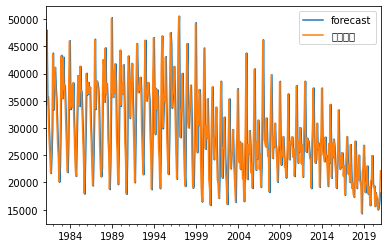

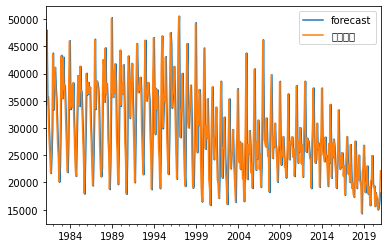

In [44]:
model_fit.plot_predict()

In [46]:
mar_df

,혼인건수
시간,
1981-01-01,49285.0
1981-02-01,34481.0
1981-03-01,47843.0
1981-04-01,35956.0
1981-05-01,35769.0
...,...
2020-08-01,15032.0
2020-09-01,15324.0
2020-10-01,16473.0


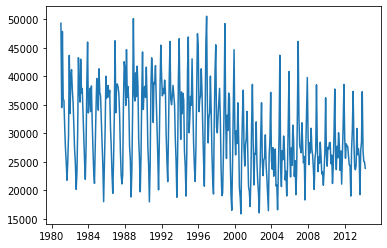

In [50]:
train=mar[0:400]
test=mar[400:]
plt.plot(train['시간'], train['혼인건수'])
plt.show()

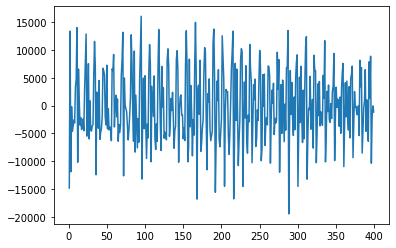

In [51]:
diff_1=train['혼인건수'].diff().dropna()
plt.plot(diff_1)
plt.show()

In [53]:
pip install scalecast==0.1.8


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.9 MB 9.3 MB/s 
     |████████████████████████████████| 216 kB 55.9 MB/s 
     |████████████████████████████████| 133 kB 63.4 MB/s 
  Created wheel for scalecast: filename=SCALECAST-0.1.8-py3-none-any.whl size=15575 sha256=61d40836ca5a9189c58a2ed5b17f6654b0e986880c15905cb9454e2078e2d486
  Stored in directory: /root/.cache/pip/wheels/e0/8f/f6/7781c589861e8eb9f756cc0b36ca6749346030a0573acab532
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=4da7557d79edad39d9f49b8d03a3d0293b3ce89f5ef4675f52bb1984d74cbf95
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built scalecast eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's depe

In [56]:
pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


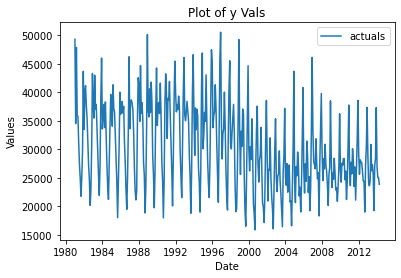

In [57]:
from scalecast.Forecaster import Forecaster
f=Forecaster(y=train['혼인건수'], current_dates=train['시간'])
f.plot()

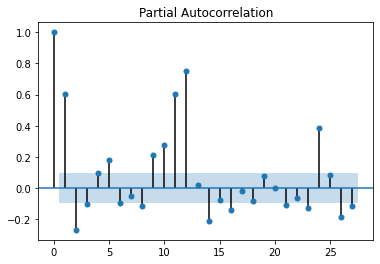

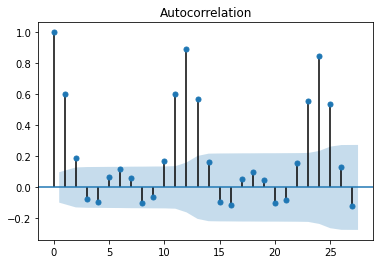

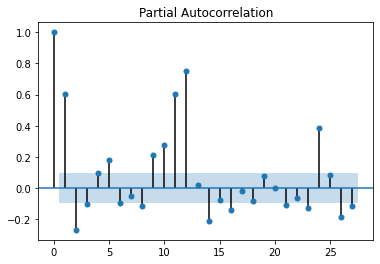

In [59]:
f.plot_acf()
f.plot_pacf()

In [67]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model=ARIMA(train['혼인건수'], order=(1,0,1))
model_fit=model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                   혼인건수   No. Observations:                  400
Model:                     ARMA(1, 1)   Log Likelihood               -4026.464
Method:                       css-mle   S.D. of innovations           5690.212
Date:                Fri, 27 May 2022   AIC                           8060.929
Time:                        14:43:54   BIC                           8076.895
Sample:                             0   HQIC                          8067.252
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.041e+04    658.513     46.183      0.000    2.91e+04    3.17e+04
ar.L1.혼인건수     0.4291      0.065      6.554      0.000       0.301       0.557
ma.L1.혼인건수     0.3247      0.066      4.923      0.0

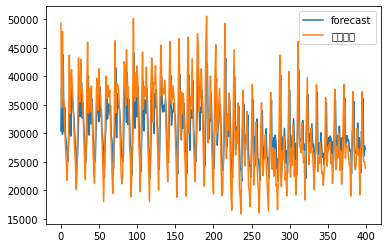

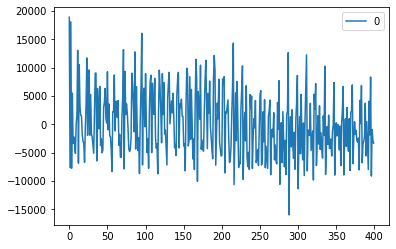

In [70]:
fig=model_fit.plot_predict()
residual=pd.DataFrame(model_fit.resid)
residual.plot()

In [72]:
mar_test=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/기계/혼인1.xlsx', index_col=0,names=['시간','y'])
mar_test

,시간,y
0,1981-01-01,49285
1,1981-02-01,34481
2,1981-03-01,47843
3,1981-04-01,35956
4,1981-05-01,35769
...,...,...
475,2020-08-01,15032
476,2020-09-01,15324
477,2020-10-01,16473
478,2020-11-01,18177


In [81]:
test=mar_test[475:]

In [82]:
test

,시간,y
475,2020-08-01,15032
476,2020-09-01,15324
477,2020-10-01,16473
478,2020-11-01,18177
479,2020-12-01,22139


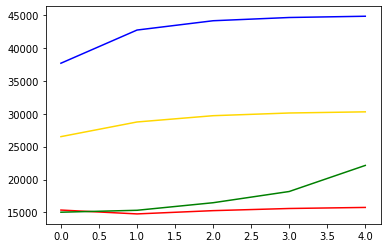

In [83]:
forecast_data=model_fit.forecast(steps=5)
pred_y=forecast_data[0].tolist()
test_y=test.y.values
pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)
      
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 
plt.plot(test_y, color="green") # 실제 

In [84]:
pred_y

[26512.17160550593,
 28738.5105013962,
 29693.814028193607,
 30103.726836165566,
 30279.61701706206]

In [85]:
test_y

array([15032, 15324, 16473, 18177, 22139])

In [88]:
from fbprophet import Prophet
file_path='/content/drive/MyDrive/Colab Notebooks/기계/혼인1.xlsx'
# prophet을 사용하기 위해서는 다음과 같이 피처의 이름을 변경해야 합니다 : 'ds', 'y'
bitcoin_df = pd.read_excel(file_path, names=['ds', 'y'])
prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

In [89]:
# 5일을 내다보며 예측합니다.
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
480,2020-12-02,25132.197002,22058.867390,28473.677147
481,2020-12-03,25066.360616,21735.146536,28485.090692
482,2020-12-04,24589.657111,21535.549467,28317.456303
483,2020-12-05,24371.429022,21063.057617,27411.787619
484,2020-12-06,24476.692394,21091.508048,27596.818326


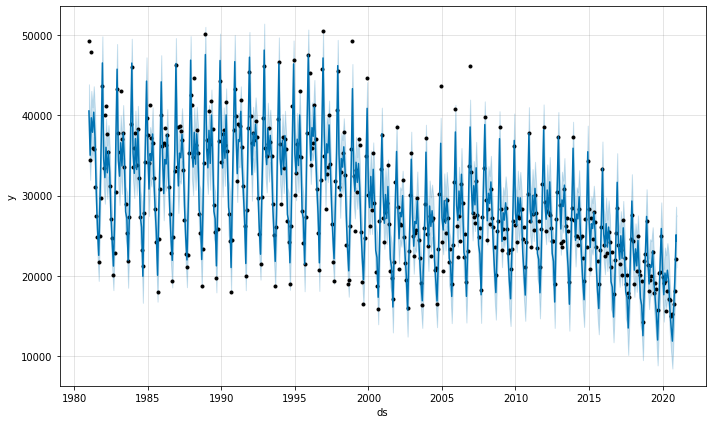

In [90]:
fig1 = prophet.plot(forecast_data)

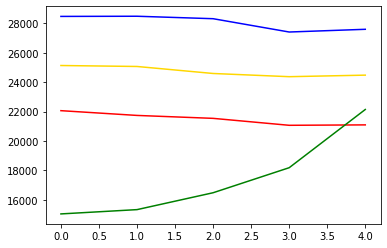

In [91]:
pred_y = forecast_data.yhat.values[-5:] # 마지막 5일의 예측 데이터입니다. (2018-08-27 ~ 2018-08-31)
test_y = test.y.values # 실제 5일 가격 데이터입니다. (2018-08-27 ~ 2018-08-31)
pred_y_lower = forecast_data.yhat_lower.values[-5:] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = forecast_data.yhat_upper.values[-5:] # 마지막 5일의 예측 데이터의 최대값입니다.

plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.